## 5.1 JPEG. Преобразование Фурье. Склейка изображений


### 1. Подготовьте одно изображение для экспериментов с гауссовской и лапласовской пирамидой.

In [1]:
from skimage.io import imread, imshow
from skimage import img_as_ubyte, img_as_float
from scipy import signal
import numpy as np

In [6]:
img = imread('lab_img.jpg')

### 2. Постройте гауссовскую пирамиду изображения из не менее чем пяти слоев.

In [2]:
# Все, что нужно для фильтра Гаусса
import math
def g_func(sigma: float, x: float, y: float)-> float: 
    return ((math.pi * 2 * sigma ** 2)**-1) * math.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))

def fill(sigma: float)->float:
    array = []
    k = round(sigma * 3)
    for x in range(- k, k + 1):
        for y in range(- k, k + 1):
            array.append(g_func(sigma, float(x), float(y)))
    array = np.array(array)
    array = array.reshape(k * 2 + 1, k * 2 + 1)
    array /= array.sum()
    return array


In [103]:
def build_gaussian(img, sigma=0.66, n_layers=5):
    box = fill(sigma)
    img_conv = img.copy()
    gaussian = []
    for _ in range(n_layers):
        new = img_conv.copy()
        if len(new.shape) > 2:
            for i in range(3):
                    new[:, :, i] = np.clip(signal.convolve2d(img_conv[:, :, i], box, "same"), 0, 255)
        else:
            new = np.clip(signal.convolve2d(img_conv, box, "same").astype('uint8'), 0, 255)
        gaussian.append(new)
        img_conv=new.copy()
    return gaussian

In [104]:
res = build_gaussian(img)

In [105]:
import matplotlib.pyplot as plt
def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,15))
    for ind,title in zip(range(len(figures)), figures):
        axeslist.ravel()[ind].imshow(figures[title], cmap=plt.jet())
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional


In [106]:
res_dic = {i:resourse for i, resourse in enumerate(res)}

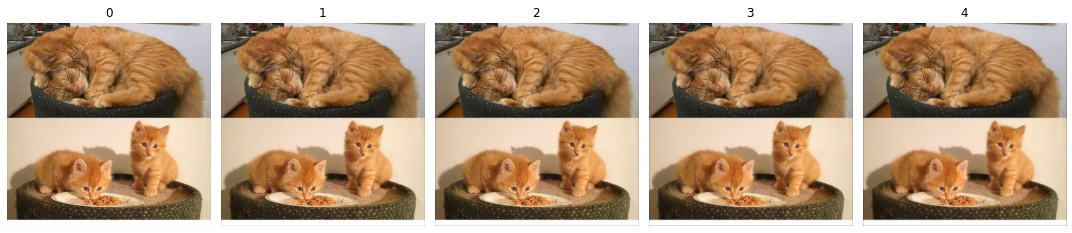

In [107]:
plot_figures(res_dic, 1, 5)
plt.show()


In [108]:
res1 = build_gaussian(img, sigma=0.5) #Посмотрим как изменится изображение с меньшей сигмой

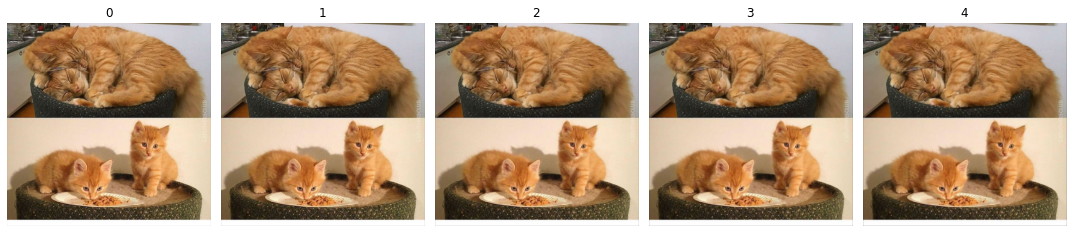

In [109]:
res1_dic = {i:resourse for i, resourse in enumerate(res1)}
plot_figures(res1_dic, 1, 5)
plt.show()

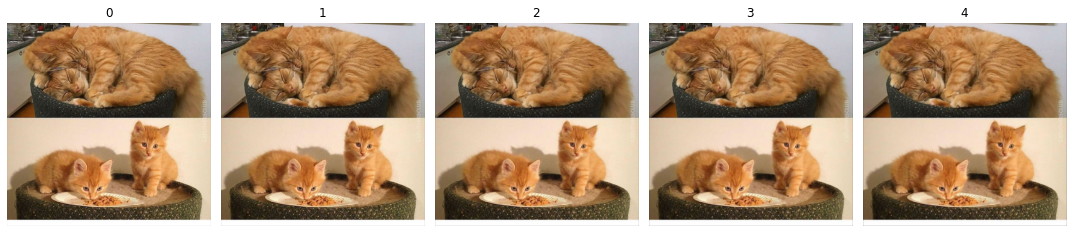

In [110]:
res2 = build_gaussian(img, sigma=1)
res2_dic = {i:resourse for i, resourse in enumerate(res1)}
plot_figures(res2_dic, 1, 5)
plt.show()

In [111]:
def laplassian(img, sigma=0.66, n_layers=5):
    images = build_gaussian(img, sigma, n_layers)
    results = []
    results.append(img - images[0])
    for i in range(1, len(images)):
        results.append(images[i] - images[i-1])
    results.append(images[len(images) - 1])
    return results
        

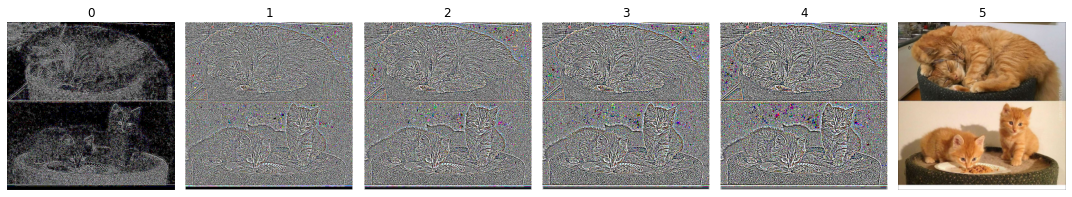

In [112]:
l = laplassian(img)
l_r = {i:resourse for i, resourse in enumerate(l)}
plot_figures(l_r, 1, len(l_r))
plt.show()

In [213]:
def final(img1, img2, mask, sigma=2, n_layers=5):
    la = laplassian(img1, sigma, n_layers)
    lb = laplassian(img2, sigma, n_layers)
    gm = build_gaussian(mask, sigma, n_layers + 1)
    la = np.array(la)
    lb = np.array(lb)
    gm = np.array(gm)
    result = gm * la + ((1 - gm) * lb)
    result = np.clip(result.astype('uint8'), 0, 255)
    #result = result.astype('uint8')
    return result


In [214]:
a = imread('a.png')
b = imread('b.png')
mask = imread('mask.png')
mask = (mask > 128).astype('float')

In [224]:
ls = final(a, b, mask, sigma = 0.45, n_layers=5)

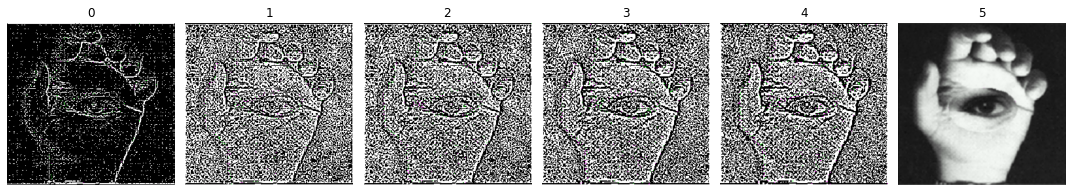

In [225]:
l_s = {i:resourse for i, resourse in enumerate(ls)}
plot_figures(l_s, 1, len(l_s))
plt.show()

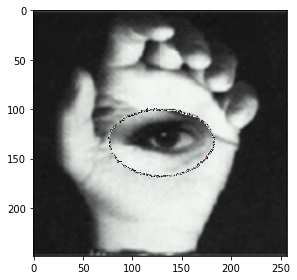

In [226]:
r = 0
for i in ls:
    r += i
imshow(r)

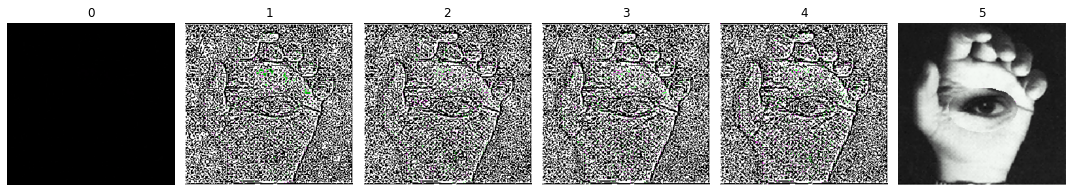

In [242]:
ls = final(a, b, mask, sigma = 0.25, n_layers=5)
l_s = {i:resourse for i, resourse in enumerate(ls)}
plot_figures(l_s, 1, len(l_s))
plt.show()

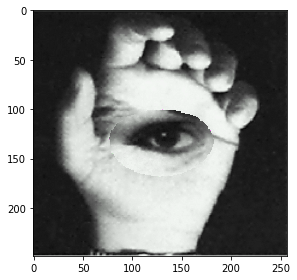

In [228]:
r = 0
for i in ls:
    r += i
imshow(r)

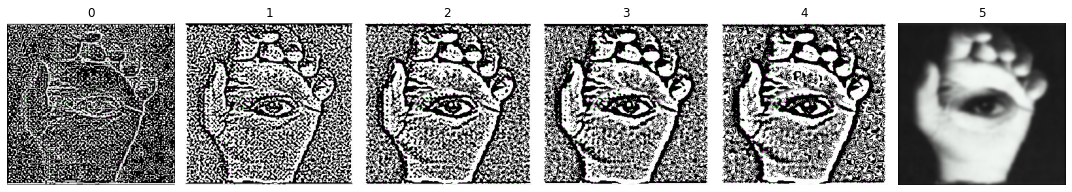

In [240]:
ls = final(a, b, mask, sigma = 1, n_layers=5)
l_s = {i:resourse for i, resourse in enumerate(ls)}
plot_figures(l_s, 1, len(l_s))
plt.show()

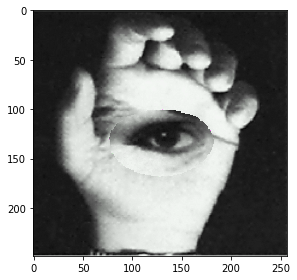

In [244]:
r = 0
for i in ls:
    r += i
imshow(r)

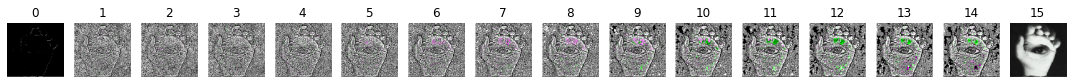

In [235]:
ls = final(a, b, mask, sigma = 0.35, n_layers=15)
l_s = {i:resourse for i, resourse in enumerate(ls)}
plot_figures(l_s, 1, len(l_s))
plt.show()

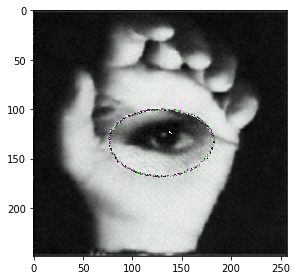

In [236]:
r = 0
for i in ls:
    r += i
imshow(r)

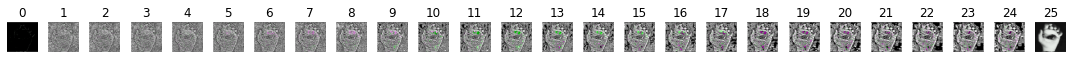

In [237]:
ls = final(a, b, mask, sigma = 0.35, n_layers=25)
l_s = {i:resourse for i, resourse in enumerate(ls)}
plot_figures(l_s, 1, len(l_s))
plt.show()

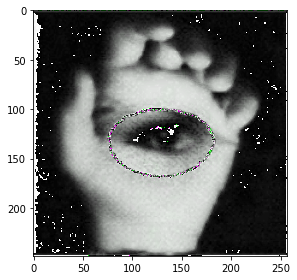

In [238]:
r = 0
for i in ls:
    r += i
imshow(r)

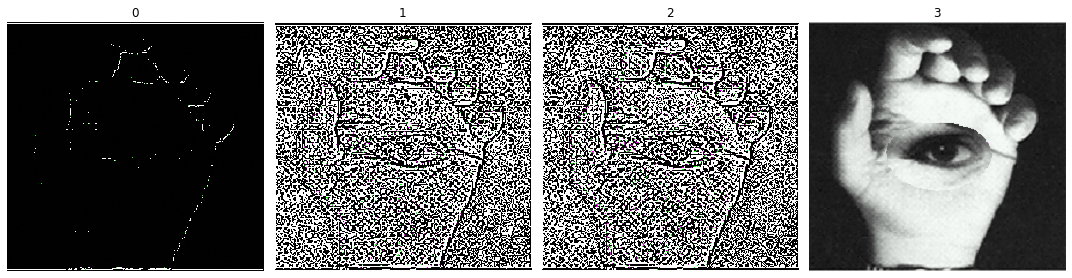

In [245]:
ls = final(a, b, mask, sigma = 0.35, n_layers=3)
l_s = {i:resourse for i, resourse in enumerate(ls)}
plot_figures(l_s, 1, len(l_s))
plt.show()

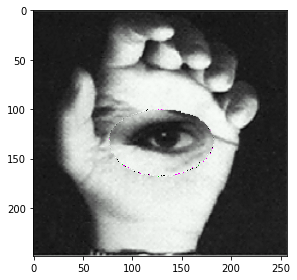

In [246]:
r = 0
for i in ls:
    r += i
imshow(r)